# Imports

In [1]:
import cv2
import sys
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import random
import numpy as np
import pickle
import tensorflow as tf
import math
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2, l1
from sklearn.preprocessing import OneHotEncoder
from keras import regularizers
from keras.models import load_model
#import tensorflow.compat.v1 as tf tf.disable_v2_behavior()

# Reading in All Image Data Into Dictionaries 

In [2]:
Data_dir = '/Users/ramiroramirez/documents/ga/Capstone Project/Anime_Face'
Categories = onlyfiles = [f for f in listdir(Data_dir)]
Categories.remove('.DS_Store')

### Plotting image data without changin color

In [75]:
len(Categories)

113

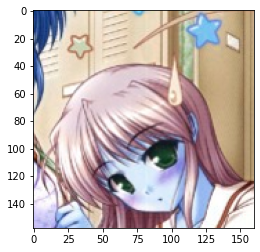

In [5]:
for category in Categories:
    path = os.path.join(Data_dir, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
        plt.imshow(img_array)
        plt.show()
        break
    break

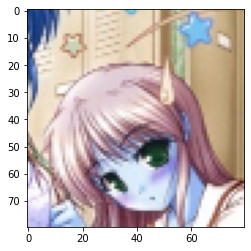

In [6]:
IMG_SIZE = 80
new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

# Creating Labled Data

In [7]:
training_data = []
def create_training_data():
    for category in Categories:
        path = os.path.join(Data_dir, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
create_training_data()

In [9]:
random.shuffle(training_data)

# Preproccessing

In [10]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [11]:
one = OneHotEncoder()
y = np.array(y)
y = one.fit_transform(y.reshape(-1, 1)).todense()

### Saving labeled data as a pickle object

In [12]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open('X.pickle', 'rb')
X=pickle.load(pickle_in)
pickle_in.close()
pickle_in = open('y.pickle', 'rb')
y=pickle.load(pickle_in)
pickle_in.close()

### Splitting Data into Train and Test Data

In [14]:
X=X/255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building Nueral Network

In [15]:
model = Sequential()
model.add(layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_SIZE, 
                                                              IMG_SIZE,
                                                              3)))
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:], kernel_regularizer=regularizers.l2(l=0.001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3),kernel_regularizer=regularizers.l2(l=0.001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), kernel_regularizer=regularizers.l2(l=0.001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(Categories),activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 80, 80, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 78, 78, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 78, 78, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 37, 37, 64)        0

### Fitting Data

In [18]:
history = model.fit(X_train, y_train, batch_size=64, epochs = 150, validation_data=(X_test, y_test))

Epoch 1/150
123/123 [==============================] - 48s 386ms/step - loss: 4.2597 - accuracy: 0.0445 - val_loss: 4.1788 - val_accuracy: 0.0861
Epoch 2/150
123/123 [==============================] - 48s 392ms/step - loss: 4.0282 - accuracy: 0.0617 - val_loss: 3.7814 - val_accuracy: 0.1014
Epoch 3/150
123/123 [==============================] - 49s 396ms/step - loss: 3.8516 - accuracy: 0.0775 - val_loss: 3.5969 - val_accuracy: 0.1330
Epoch 4/150
123/123 [==============================] - 48s 394ms/step - loss: 3.7052 - accuracy: 0.0994 - val_loss: 3.6217 - val_accuracy: 0.1356
Epoch 5/150
123/123 [==============================] - 48s 388ms/step - loss: 3.5842 - accuracy: 0.1204 - val_loss: 3.2651 - val_accuracy: 0.2253
Epoch 6/150
123/123 [==============================] - 48s 390ms/step - loss: 3.4857 - accuracy: 0.1365 - val_loss: 3.2878 - val_accuracy: 0.2268
Epoch 7/150
123/123 [==============================] - 49s 395ms/step - loss: 3.3415 - accuracy: 0.1665 - val_loss: 3.0194 -

Epoch 57/150
123/123 [==============================] - 49s 397ms/step - loss: 2.3620 - accuracy: 0.4453 - val_loss: 2.0065 - val_accuracy: 0.6004
Epoch 58/150
123/123 [==============================] - 49s 398ms/step - loss: 2.3593 - accuracy: 0.4467 - val_loss: 1.9617 - val_accuracy: 0.6116
Epoch 59/150
123/123 [==============================] - 49s 396ms/step - loss: 2.4115 - accuracy: 0.4383 - val_loss: 1.9695 - val_accuracy: 0.6086
Epoch 60/150
123/123 [==============================] - 49s 399ms/step - loss: 2.3780 - accuracy: 0.4512 - val_loss: 1.9972 - val_accuracy: 0.6091
Epoch 61/150
123/123 [==============================] - 49s 396ms/step - loss: 2.3720 - accuracy: 0.4540 - val_loss: 1.9482 - val_accuracy: 0.6162
Epoch 62/150
123/123 [==============================] - 49s 396ms/step - loss: 2.3586 - accuracy: 0.4518 - val_loss: 1.9412 - val_accuracy: 0.6157
Epoch 63/150
123/123 [==============================] - 49s 399ms/step - loss: 2.3679 - accuracy: 0.4466 - val_loss: 1

123/123 [==============================] - 48s 389ms/step - loss: 2.2352 - accuracy: 0.4950 - val_loss: 1.8497 - val_accuracy: 0.6376
Epoch 113/150
123/123 [==============================] - 48s 390ms/step - loss: 2.2374 - accuracy: 0.4938 - val_loss: 1.8014 - val_accuracy: 0.6748
Epoch 114/150
123/123 [==============================] - 47s 383ms/step - loss: 2.2164 - accuracy: 0.4945 - val_loss: 1.8038 - val_accuracy: 0.6478
Epoch 115/150
123/123 [==============================] - 846s 7s/step - loss: 2.2456 - accuracy: 0.4885 - val_loss: 1.7951 - val_accuracy: 0.6636
Epoch 116/150
123/123 [==============================] - 48s 390ms/step - loss: 2.2162 - accuracy: 0.4864 - val_loss: 1.7937 - val_accuracy: 0.6524
Epoch 117/150
123/123 [==============================] - 48s 392ms/step - loss: 2.2514 - accuracy: 0.4796 - val_loss: 1.8046 - val_accuracy: 0.6539
Epoch 118/150
123/123 [==============================] - 48s 390ms/step - loss: 2.2266 - accuracy: 0.4910 - val_loss: 1.8157 - v

In [76]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights(f"model_{len(Categories)}_char.h5")
print("Saved model to disk")

Saved model to disk


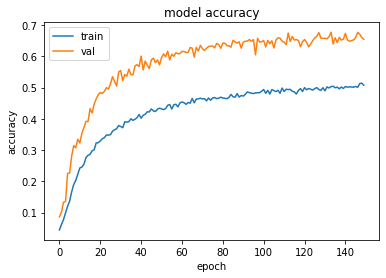

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

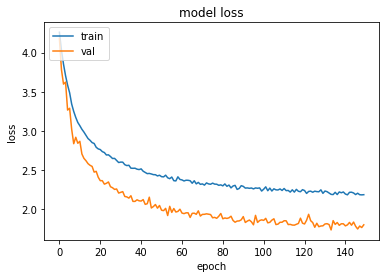

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
y_pred = model.predict_classes(X_test)
y_prob = model.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
y_labels = []
for i in range(len(np.array(y_test))):
    for j in range(len(np.array(y_test)[1])):
        if np.array(y_test)[i][j]==1.:
            y_labels.append(j)

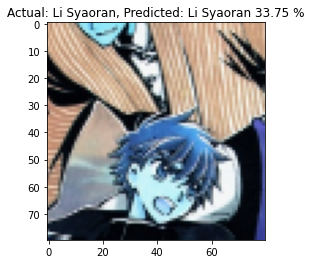

In [74]:
i= random.randint(0,len(y_labels)-1)

plt.imshow(X_test[i],);
plt.title(f'Actual: {Categories[y_labels[i]]}, Predicted: {Categories[y_pred[i]]} {round(y_prob[i].max()*100,2)} %');


# Loading in a Pretrained Face Detecting Model

In [77]:
def detect(filename,outputname,cascade_file = "lbpcascade_animeface.xml"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray,
                                     scaleFactor = 1.05,
                                     minNeighbors = 5,
                                     minSize = (30, 30))
    try:
        print(1)
        top_shift_scale = 0.2
        x_scale = 0
        for (x, y, w, h) in faces:
            y_shift = int(h * top_shift_scale)
            x_shift = int(w * x_scale)
            cropped = image[y-y_shift: y + h, x-x_shift: x + w + x_shift]
            cropped = cv2.resize(cropped, (IMG_SIZE, IMG_SIZE))
            cropped = np.array(cropped).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
            cv2.rectangle(image, (x-x_shift, y-y_shift), (x + w + x_shift, y + h), (0, 0, 255), 2)
            cv2.putText(image, f'{Categories[model.predict_classes(cropped/255)[0]]}: {round(model.predict(cropped).max()*100,2)}%',(x+50, y-40), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
            cv2.imwrite("out.png", image)
    except:
        print(2)
        for (x, y, w, h) in faces:
            cropped = image[y: y + h, x: x + w]
            cropped = cv2.resize(cropped, (IMG_SIZE, IMG_SIZE))
            cropped = np.array(cropped).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
            plt.imshow(cropped[0])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(image, f'{Categories[model.predict_classes(cropped/255)[0]]}: {round(model.predict(cropped).max()*100,2)}%',(x+50, y-40), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
            cv2.imwrite("out.png", image)

In [82]:
detect('rin.png',outputname='out')

1


In [ ]:
cap = cv2.VideoCapture("yy.mp4")
ret, img = cap.read()
height, width, layers = img.shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height))
while (cap.isOpened()):
    ret, img = cap.read()
    if ret == True:
        
        cascade = cv2.CascadeClassifier("lbpcascade_animeface.xml")
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.equalizeHist(gray)
        faces = cascade.detectMultiScale(gray,
                                         scaleFactor = 1.05,
                                         minNeighbors = 5,
                                         minSize = (30, 30))
        try:
            top_shift_scale = 0.2
            x_scale = 0 
            for (x, y, w, h) in faces:
                y_shift = int(h * top_shift_scale)
                x_shift = int(w * x_scale)
                cropped = img[y-y_shift: y + h, x-x_shift: x + w + x_shift]
                cropped = cv2.resize(cropped, (IMG_SIZE, IMG_SIZE))
                cropped = np.array(cropped).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
                cv2.rectangle(img, (x-x_shift, y-y_shift), (x + w + x_shift, y + h), (0, 0, 255), 2)
                cv2.putText(img, f'{Categories[model.predict_classes(cropped/255)[0]]}: {round(model.predict(cropped).max()*100,2)}%',(x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
                cv2.imwrite("out.png", img)
        except:
            for (x, y, w, h) in faces:
                cropped = img[y: y + h, x: x + w]
                cropped = cv2.resize(cropped, (IMG_SIZE, IMG_SIZE))
                cropped = np.array(cropped).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
                plt.imshow(cropped[0])
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cv2.putText(img, f'{Categories[model.predict_classes(cropped/255)[0]]}: {round(model.predict(cropped).max()*100,2)}%',(x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
                cv2.imwrite("out.png", img)
        video.write(img)
        if (cv2.waitKey(1)) & (0xff == ord('q')):
            break
    else:
        break
cap.release()
video.release()        
cv2.destroyAllWindows()

In [83]:
from sklearn.metrics import plot_confusion_matrix

In [84]:
plot_confusion_matrix(model, X, y , normalize='true', xticks_rotation = 'vertical', display_labels = list(train_generator.class_indices.keys()))

NameError: name 'train_generator' is not defined